* school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
* sex - student's sex (binary: 'F' - female or 'M' - male)
* age - student's age (numeric: from 15 to 22)
* address - student's home address type (binary: 'U' - urban or 'R' - rural)
* famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
* Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
* Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
* Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
* Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
* guardian - student's guardian (nominal: 'mother', 'father' or 'other')
* traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
* studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
* failures - number of past class failures (numeric: n if 1<=n<3, else 4)
* schoolsup - extra educational support (binary: yes or no)
* famsup - family educational support (binary: yes or no)
* paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
* activities - extra-curricular activities (binary: yes or no)
* nursery - attended nursery school (binary: yes or no)
* higher - wants to take higher education (binary: yes or no)
* internet - Internet access at home (binary: yes or no)
* romantic - with a romantic relationship (binary: yes or no)
* famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
* freetime - free time after school (numeric: from 1 - very low to 5 - very high)
* goout - going out with friends (numeric: from 1 - very low to 5 - very high)
* Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
* Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
* health - current health status (numeric: from 1 - very bad to 5 - very good)
* absences - number of school absences (numeric: from 0 to 93)


* G1 - first period grade (numeric: from 0 to 20)
* G2 - second period grade (numeric: from 0 to 20)
* G3 - final grade (numeric: from 0 to 20, output target)

## Erzeuge einen DataFrame aus `student-math.csv`

In [70]:
import pandas as pd
df = pd.read_csv("./data/student-math.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   age         395 non-null    int64  
 3   address     395 non-null    object 
 4   famsize     395 non-null    object 
 5   Pstatus     395 non-null    object 
 6   Medu        395 non-null    int64  
 7   Fedu        395 non-null    int64  
 8   Mjob        395 non-null    object 
 9   Fjob        395 non-null    object 
 10  reason      395 non-null    object 
 11  guardian    395 non-null    object 
 12  traveltime  359 non-null    float64
 13  studytime   395 non-null    int64  
 14  failures    395 non-null    int64  
 15  schoolsup   395 non-null    object 
 16  famsup      395 non-null    object 
 17  paid        395 non-null    object 
 18  activities  395 non-null    object 
 19  nursery     395 non-null    o

## Ermittle nach Geschlechtern gruppiert den durchschnittlichen Alkoholkonsum

In [37]:
df.groupby(by="sex")["Dalc","Walc"].mean(numeric_only=True)

C:\Users\longb\AppData\Local\Temp\ipykernel_13660\544490496.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(by="sex")["Dalc","Walc"].mean(numeric_only=True)


,Dalc,Walc
sex,,
F,1.254808,1.956731
M,1.732620,2.663102


## Ermittle jene 3 Features, welche am meisten mit `G3` korrelieren, abgesehen von `G1` und `G2`


In [51]:
df.corr().sort_values("G3", ascending=False).drop(labels={"G1","G2","G3"}).G3.head(3)

C:\Users\longb\AppData\Local\Temp\ipykernel_13660\2701173817.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().sort_values("G3", ascending=False).drop(labels={"G1","G2","G3"}).G3.head(3)


Medu         0.217147
Fedu         0.152457
studytime    0.097820
Name: G3, dtype: float64

## Ermittle jene 3 Features, welche am meisten mit `Walc` korrelieren

In [53]:
df.corr().sort_values("Walc",ascending=False).drop("Walc").Walc.head(3)

C:\Users\longb\AppData\Local\Temp\ipykernel_13660\4099757158.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().sort_values("Walc",ascending=False).drop("Walc").Walc.head(3)


Dalc          0.647544
goout         0.420386
traveltime    0.151604
Name: Walc, dtype: float64

## Ermittle die Absenzzahl jenes Schülers mit den meisten Absenzen, der trotzdem >= 10 G3 hat

In [61]:
df.query("G3 >= 10").sort_values("absences", ascending=False).absences.head(1)

74    54
Name: absences, dtype: int64

## Ermittle, ob die Schüler mit mehr als 18 Punkten eher aus dem ruralen oder aus dem urbanen Raum kommen

In [79]:
df.query("G3 > 18").address

8      U
47     U
110    U
113    U
286    U
374    R
Name: address, dtype: object

## Versuche, folgende Behauptung zu widerlegen:
"Dass die Eltern unter einem Dach leben ist sehr wichtig für eine **herausragende** Mathematiknote, immerhin leben doppelt so viele dieser Schüler mit **beiden** Eltern zusammen"

In [93]:
df.query("G3 >= 18").groupby("Pstatus")

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
36,GP,M,15,U,LE3,T,4,3,teacher,services,...,5,4,3,1,1,4,2,15,16,18
42,GP,M,15,U,GT3,T,4,4,services,teacher,...,4,3,3,1,1,5,2,19,18,18
47,GP,M,16,U,GT3,T,4,3,health,services,...,4,2,2,1,1,2,4,19,19,20
91,GP,F,15,U,GT3,T,4,3,services,other,...,4,5,5,1,3,1,4,16,17,18
104,GP,M,15,U,GT3,A,3,4,services,other,...,5,4,4,1,1,1,0,16,18,18
107,GP,M,16,U,GT3,T,3,3,services,other,...,5,3,3,1,1,5,2,16,18,18
110,GP,M,15,U,LE3,A,4,4,teacher,teacher,...,5,5,3,1,1,4,6,18,19,19
306,GP,M,20,U,GT3,A,3,2,services,other,...,5,5,3,1,1,5,0,17,18,18


## Erzeuge folgende Graphik, welche die Punkte nach Adresse darstellt
![img.png](./assets/img.png)
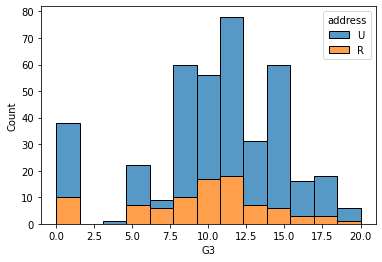

<AxesSubplot: xlabel='G3', ylabel='Count'>

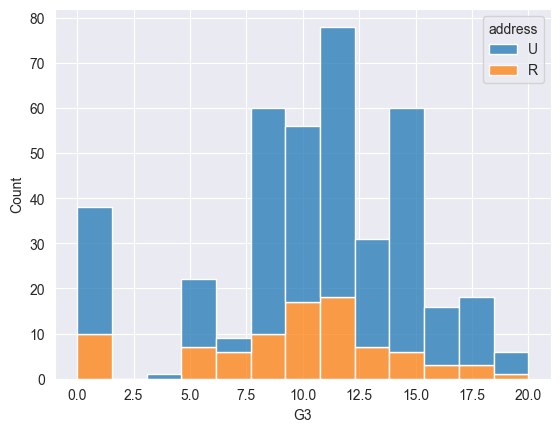

In [94]:
import seaborn as sns
sns.histplot(data=df, x="G3", hue="address", multiple="stack")

## Ermittle die durchschnittliche Punktzahl aller Schüler, bei denen Mutter und Vater derselben Berufsgruppe angehören, gruppiert nach Berufsgruppe

In [98]:
df.query("Fjob == Mjob").groupby("Fjob").G3.mean()

Fjob
at_home     12.285714
health      13.500000
other        9.798077
services    10.767442
teacher     13.083333
Name: G3, dtype: float64

## Ersetze fehlende Werte durch den **Median** der jeweiligen `address`

C:\Users\longb\AppData\Local\Temp\ipykernel_13660\1223544637.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfu = df.groupby("address").mean()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
